In [1]:
from sklearn import datasets, neighbors, metrics
import pandas as pd
import seaborn as sns

In [2]:
%matplotlib inline

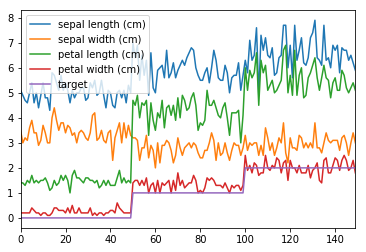

In [6]:
irisdf.plot()
# own work, asked to plot

Axes(0.125,0.125;0.775x0.755)
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.054000           3.758667   
std             0.828066          0.433594           1.764420   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.198667    1.000000  
std            0.763161    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


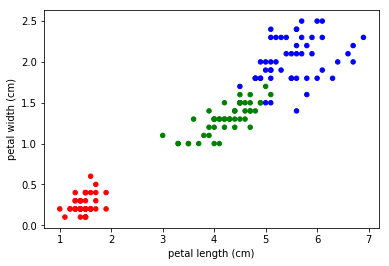

In [7]:
iris = datasets.load_iris()
irisdf = pd.DataFrame(iris.data, columns=iris.feature_names)
irisdf['target'] = iris.target
cmap = {'0': 'r', '1': 'g', '2': 'b' }
irisdf['ctarget'] = irisdf.target.apply(lambda x: cmap[str(x)])
print irisdf.plot('petal length (cm)', 'petal width (cm)', kind='scatter', c=irisdf.ctarget)
print irisdf.describe()

def my_classifier(row):
    if row['petal length (cm)'] < 2:
        return 0
    else:
        return 1

predictions = irisdf.apply(my_classifier, axis=1)

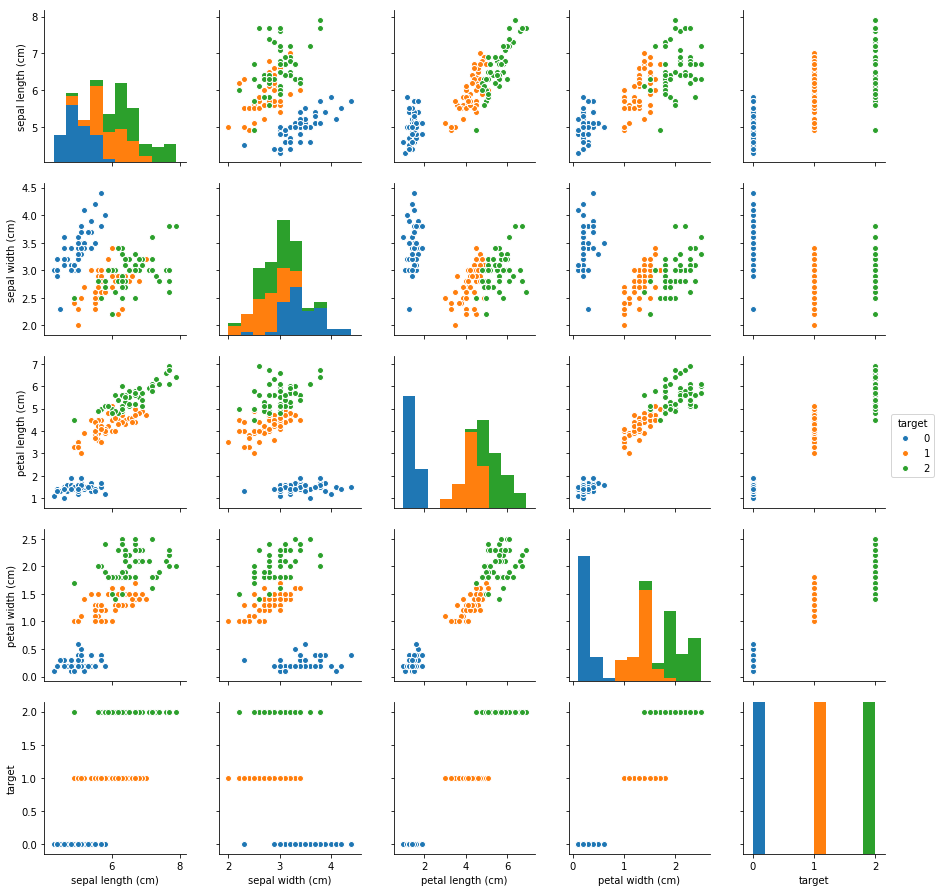

In [15]:
sns.pairplot(data = irisdf, hue = 'target')

In [16]:
irisdf['predictions'] = predictions

print float(len(irisdf[irisdf.target == irisdf.predictions])) / len(irisdf)

0.666666666667


### Starter Code

Work on improving the classifier below.

In [17]:
def my_classifier(row):
    if row['petal length (cm)'] < 2:
        return 0
    else:
        return 1

predictions = irisdf.apply(my_classifier, axis=1)

irisdf['predictions'] = predictions

print float(len(irisdf[irisdf.target == irisdf.predictions])) / len(irisdf)

0.666666666667


In [24]:
irisdf['predictions'] = predictions
(irisdf.predictions == irisdf.target).sum()/float(len(irisdf))
def my_classifier(row):
    if row['petal length (cm)'] < 2:
        return 0
    else:
        return 1

predictions = irisdf.apply(my_classifier, axis=1)

irisdf['predictions'] = predictions

print float(len(irisdf[irisdf.target == irisdf.predictions])) / len(irisdf)
# len(irisdf) just for counting number of observations, note the == because we're not assigning a value
# able to predict in 67% of the cases 

0.666666666667


In [25]:
irisdf['predictions'] = predictions
(irisdf.predictions == irisdf.target).sum()/float(len(irisdf))
def my_classifier(row):
    if row['petal length (cm)'] < 2:
        return 0
    elif row['petal length (cm)'] < 4.8:
        return 1
    else:
        return 2

predictions = irisdf.apply(my_classifier, axis=1)

irisdf['predictions'] = predictions

print float(len(irisdf[irisdf.target == irisdf.predictions])) / len(irisdf)

0.953333333333


In [40]:
irisdf['predictions'] = predictions
(irisdf.predictions == irisdf.target).sum()/float(len(irisdf))
def my_classifier(row):
    if (row['petal length (cm)'] < 2) and (row['petal width (cm)'] < .7):
        return 0
    elif (row['petal length (cm)'] < 4.8) and (row['petal width (cm)'] < 1.6):
        return 1
    else:
        return 2

predictions = irisdf.apply(my_classifier, axis=1)

irisdf['predictions'] = predictions

print float(len(irisdf[irisdf.target == irisdf.predictions])) / len(irisdf)

0.946666666667


### Using distance: KNN implementation

In [28]:
irisdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,ctarget,predictions
0,5.1,3.5,1.4,0.2,0,r,0
1,4.9,3.0,1.4,0.2,0,r,0
2,4.7,3.2,1.3,0.2,0,r,0
3,4.6,3.1,1.5,0.2,0,r,0
4,5.0,3.6,1.4,0.2,0,r,0


In [31]:
# last two columns bc want to look at petal length & width
iris.data[:,2:]

array([[ 1.4,  0.2],
       [ 1.4,  0.2],
       [ 1.3,  0.2],
       [ 1.5,  0.2],
       [ 1.4,  0.2],
       [ 1.7,  0.4],
       [ 1.4,  0.3],
       [ 1.5,  0.2],
       [ 1.4,  0.2],
       [ 1.5,  0.1],
       [ 1.5,  0.2],
       [ 1.6,  0.2],
       [ 1.4,  0.1],
       [ 1.1,  0.1],
       [ 1.2,  0.2],
       [ 1.5,  0.4],
       [ 1.3,  0.4],
       [ 1.4,  0.3],
       [ 1.7,  0.3],
       [ 1.5,  0.3],
       [ 1.7,  0.2],
       [ 1.5,  0.4],
       [ 1. ,  0.2],
       [ 1.7,  0.5],
       [ 1.9,  0.2],
       [ 1.6,  0.2],
       [ 1.6,  0.4],
       [ 1.5,  0.2],
       [ 1.4,  0.2],
       [ 1.6,  0.2],
       [ 1.6,  0.2],
       [ 1.5,  0.4],
       [ 1.5,  0.1],
       [ 1.4,  0.2],
       [ 1.5,  0.1],
       [ 1.2,  0.2],
       [ 1.3,  0.2],
       [ 1.5,  0.1],
       [ 1.3,  0.2],
       [ 1.5,  0.2],
       [ 1.3,  0.3],
       [ 1.3,  0.3],
       [ 1.3,  0.2],
       [ 1.6,  0.6],
       [ 1.9,  0.4],
       [ 1.4,  0.3],
       [ 1.6,  0.2],
       [ 1.4,

In [32]:
# now in pandas dataframe
irisdf[['petal length (cm)', 'petal width (cm)']].head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [35]:
from sklearn import datasets, neighbors, metrics
import pandas as pd

# iris = datasets.load_iris()
# n_neighbors is our option in KNN. We'll tune this value to attempt to improve our prediction.
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(irisdf[['petal length (cm)', 'petal width (cm)']], irisdf.target)
# print knn.predict(iris.data[:,2:])
# print iris.target

print knn.score(irisdf[['petal length (cm)', 'petal width (cm)']], irisdf.target)

0.96


In [48]:
# or do this for the data frame
cols_to_keep = irisdf[['petal length (cm)', 'petal width (cm)']]

knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(cols_to_keep, irisdf.target)

print knn.score(cols_to_keep, irisdf.target)

0.96


Do we see a change in performance when using the distance weight?

In [41]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance') # add in the weights parameter here
knn.fit(iris.data[:,2:], iris.target)
print knn.predict(iris.data[:,2:])
print iris.target

print knn.score(iris.data[:,2:], iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
0.993333333333


Yes, we see a change adding the weights = 'distance'

### Solution to solving K

This is only one approach to the problem, but adding in the 'distance' parameter (instead of uniform) would only be additive. Note the code would need some editing to handle it properly if done in the grid search; alternatively, make the change directly in the estimator.

In [45]:
from sklearn import grid_search, cross_validation
import matplotlib.pyplot as plt
import numpy as py

# some n_list! keep in mind cross validation
# recall: what's an effective way to create a numerical list in python?
params = {'n_neighbors':range(1,30),'weights':['distance']}
kf = cross_validation.KFold(len(irisdf), n_folds = 5)
gs = grid_search.GridSearchCV(
    estimator=neighbors.KNeighborsClassifier(),
    param_grid=params,
    cv=kf,
)
gs.fit(iris.data, iris.target)
gs.grid_scores_

[mean: 0.92667, std: 0.06799, params: {'n_neighbors': 1, 'weights': 'distance'},
 mean: 0.92667, std: 0.06799, params: {'n_neighbors': 2, 'weights': 'distance'},
 mean: 0.90667, std: 0.09286, params: {'n_neighbors': 3, 'weights': 'distance'},
 mean: 0.90667, std: 0.09286, params: {'n_neighbors': 4, 'weights': 'distance'},
 mean: 0.91333, std: 0.08327, params: {'n_neighbors': 5, 'weights': 'distance'},
 mean: 0.91333, std: 0.08327, params: {'n_neighbors': 6, 'weights': 'distance'},
 mean: 0.92667, std: 0.07717, params: {'n_neighbors': 7, 'weights': 'distance'},
 mean: 0.92000, std: 0.07483, params: {'n_neighbors': 8, 'weights': 'distance'},
 mean: 0.92000, std: 0.09092, params: {'n_neighbors': 9, 'weights': 'distance'},
 mean: 0.92667, std: 0.08000, params: {'n_neighbors': 10, 'weights': 'distance'},
 mean: 0.92000, std: 0.09092, params: {'n_neighbors': 11, 'weights': 'distance'},
 mean: 0.91333, std: 0.08844, params: {'n_neighbors': 12, 'weights': 'distance'},
 mean: 0.92000, std: 0.07

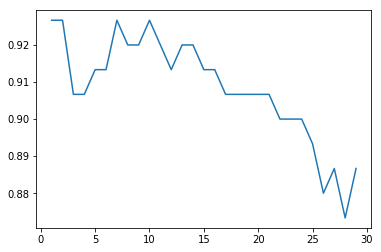

In [49]:
# visualize performance
k = range(1,30)
plt.plot(k,[s[1] for s in  gs.grid_scores_],)

Which K's give the best accuracy? Based on above plot, the best K is therefore probably 10, 7, or 1

Is there a way to get best K?

In [54]:
gs.best_params_

{'n_neighbors': 1, 'weights': 'distance'}

In [55]:
gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='distance')